In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp

<a> href="https://youtu.be/Aaxw4zbULMs" >Link to video of dynamics</a><br>
A diagram of the problem in hand:<br>
<ul> 
    <li>The entire system dempends on the two angles and distance of the surface: $x$, $\theta$, $\alpha$</li>
    <li>These varblies will be used as our generalised coordinates</li> 
    <li>All masses are modeled as point masses and the sring is massless and unextendable</li>
</ul> 

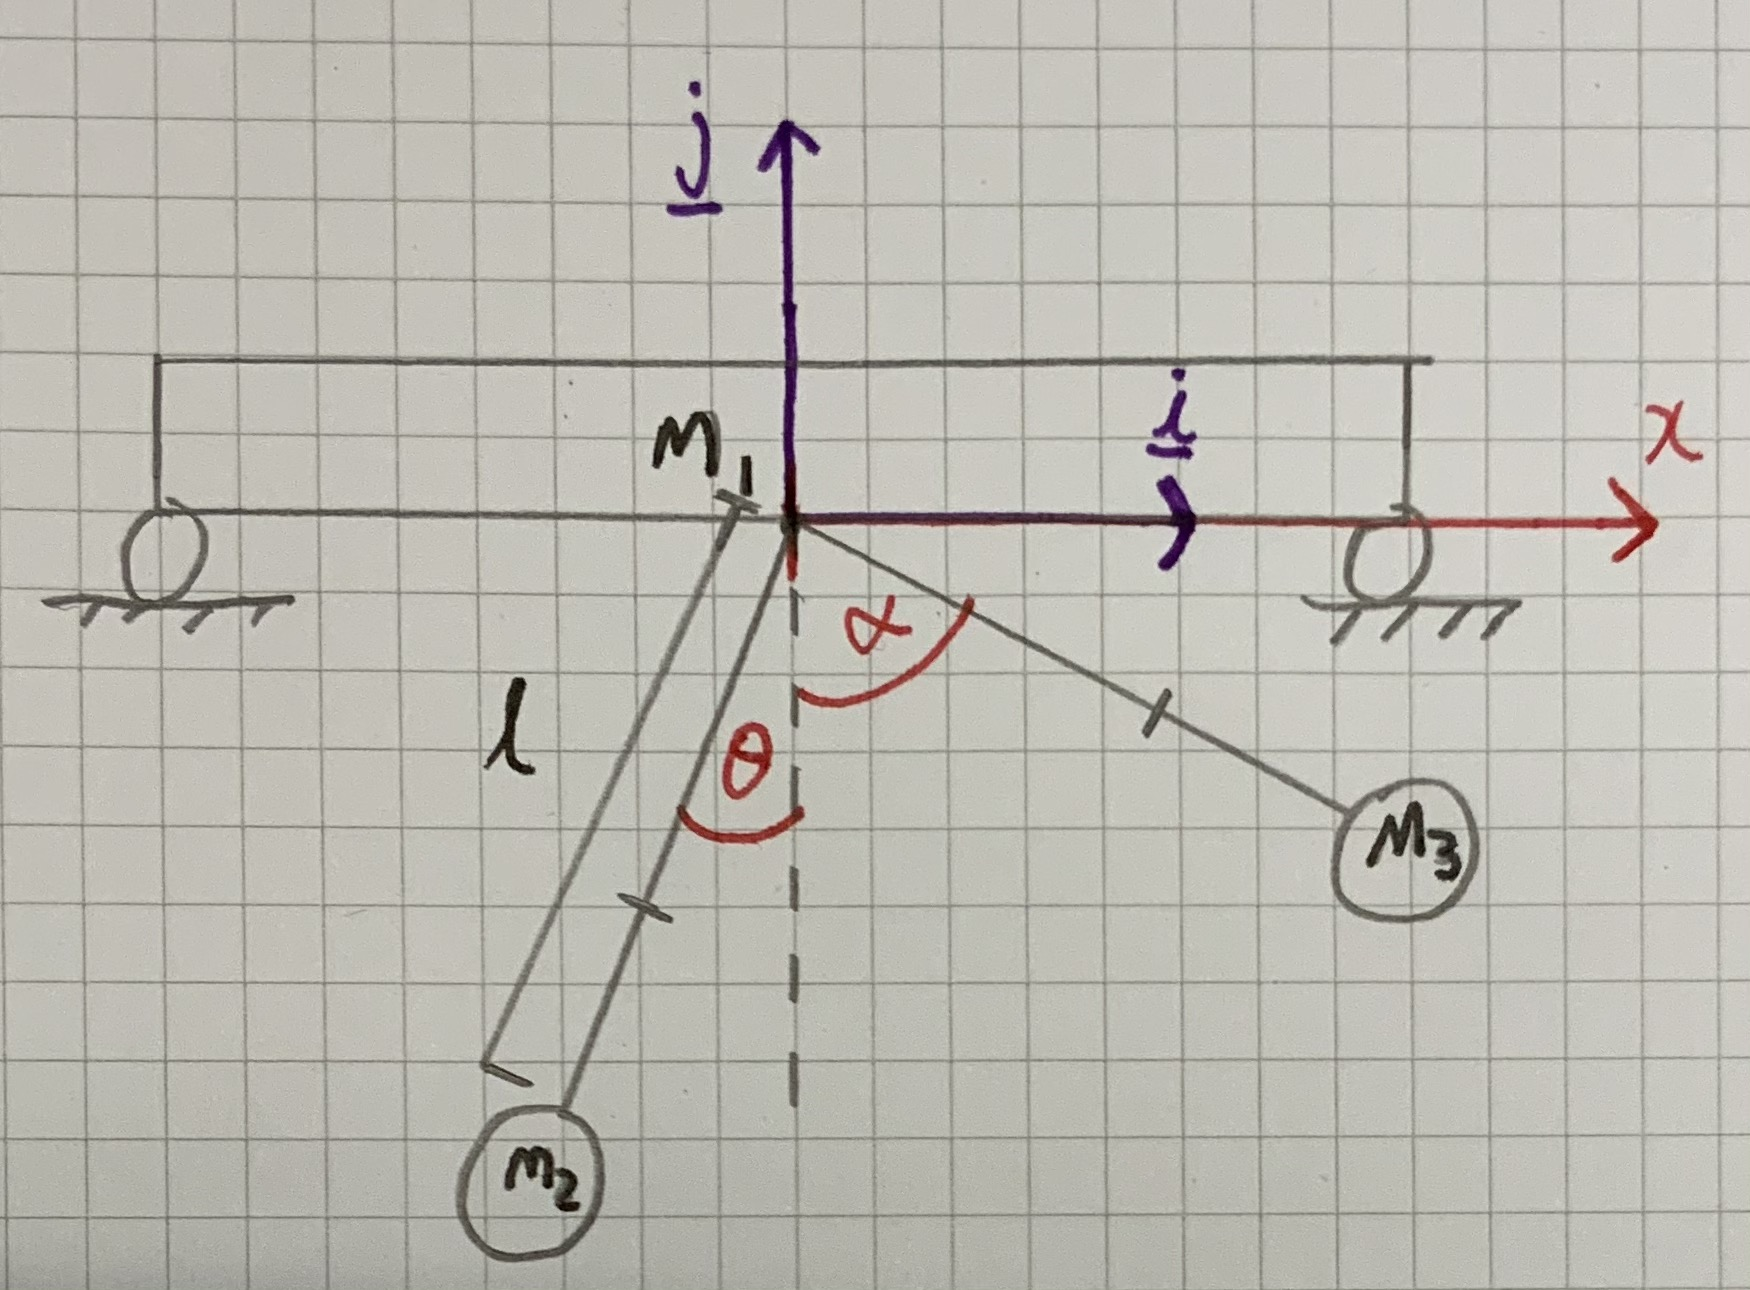 

Define all symbols we need for this problem using sympy:   

In [15]:
t, g, l, m1, m2, m3 = smp.symbols('t g l m_1 m_2 m_3')
x, theta, alpha = smp.symbols(r'x \theta \alpha', cls=smp.Function)

Define $q(t)$ and $\dot{q}(t)$ and $\ddot{q}(t)$

In [16]:
x = x(t)
theta = theta(t)
alpha = alpha(t) 

x_d = smp.diff(x, t)
theta_d = smp.diff(theta, t)
alpha_d = smp.diff(alpha, t) 

x_dd = smp.diff(x_d, t)
theta_dd = smp.diff(theta_d, t)
alpha_dd = smp.diff(alpha_d, t)

Define the $x$ and $y$ coordinates of all three masses

In [17]:
x1 = x 
y1 = 0 
x2 = x1 + l*smp.sin(theta)
y2 = -l*smp.cos(theta)
x3 = x1 + l*smp.sin(alpha)
y3 = -l*smp.cos(alpha)

Define both kinetic and potential energy:<br> 
<ul> 
    <li>Kinetic energy $T$ comes from the motion of the three masses</li>
    <li>Potential energy $U$ comes from both the gravitational potential energy of the masses $mgy$</li> 
</ul>

In [18]:
T = smp.Rational(1,2) * m1 * (smp.diff(x1,t)**2 + smp.diff(y1,t)**2) \
    +smp.Rational(1,2) * m2 * (smp.diff(x2,t)**2 + smp.diff(y2,t)**2) \
    +smp.Rational(1,2) * m3 * (smp.diff(x3,t)**2 + smp.diff(y3,t)**2) 
    
U = m2*g*y2 + m3*g*y3 

# lagrangian 

L = T-U 

Look at the lagrangian

In [19]:
L

g*l*m_2*cos(\theta(t)) + g*l*m_3*cos(\alpha(t)) + m_1*Derivative(x(t), t)**2/2 + m_2*(l**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (l*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))**2)/2 + m_3*(l**2*sin(\alpha(t))**2*Derivative(\alpha(t), t)**2 + (l*cos(\alpha(t))*Derivative(\alpha(t), t) + Derivative(x(t), t))**2)/2

Equations of motion:<br>

\begin{equation}
  \label{eq:t}
  \begin{aligned}
    \frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial x} &= 0\\        
    \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} - \frac{\partial L}{\partial \theta} &= 0\\
    \frac{d}{dt}\frac{\partial L}{\partial \dot{\alpha}} - \frac{\partial L}{\partial \alpha} &= 0
  \end{aligned}
\end{equation}    

In [20]:
LE1 = smp.diff(smp.diff(L, x_d), t) - smp.diff(L , x).simplify()          
LE2 = smp.diff(smp.diff(L, theta_d), t) - smp.diff(L, theta).simplify()
LE3 = smp.diff(smp.diff(L, alpha_d), t) - smp.diff(L, alpha).simplify()  

Solve Lagranges equations (this as sumes that <code>LE1</code> and <code>LE2</code> and <code>LE3</code> are both equal to zero)<br> 

<ul> 
    <li>We solve these equations (which are linear in $\ddot{q}(t)$) for $\ddot{q}(t)$</li> 
</ul>
    

In [21]:
sols = smp.solve([LE1, LE2, LE3], (x_dd, theta_dd, alpha_dd),
                simplify=False, rational=False) 

Now we have:<br> 
<ul> 
    <li> $\ddot{x}(t) = \ldots$ </li>
    <li> $\ddot{\theta}(t) = \ldots$ </li>
    <li> $\ddot{\alpha}(t) = \ldots$ </li> 
</ul> 

These are two second order ODEs. In python we can only solve systems of first order ODEs. Any system of second order ODEs can be converted as follows:<br> 

<ol>
    <li>Define $z_1 = \frac{dx}{dt}$ and $z_2 = \frac{d\theta}{dt}$ and $z_3 = \frac{d\alpha}{dt}$</li>
    <li>Then $\frac{dz_1}{dt} = \frac{d^2 x}{dt^2}$ and $\frac{dz_2}{dt} = \frac{d^2 \theta}{dt^2}$ and $\frac{dz_3}{dt} = \frac{d^2 \alpha}{dt^2}$</li> 
</ol> 

Now we get a system of 6 first order ODEs (as opposed to 3 second order ones)<br> 

<ul>
    <li>$\frac{dz_1}{dt} = \ldots$</li>
    <li>$\frac{dx}{dt} = z_1$</li>
    <li>$\frac{dz_2}{dt} = \ldots$</li>
    <li>$\frac{d\theta}{dt} = z_2$</li> 
    <li>$\frac{dz_3}{dt} = \ldots$</li>
    <li>$\frac{d\alpha}{dt} = z_3$</li> 
</ul> 


We need to convert the symbolic expressions above to numerical functions so we can use them in a numerical python solver. For this we use <code>smp.lambdify</code>

In [22]:
dz1dt_f = smp.lambdify((t,g,l,m1,m2,m3,x,theta,alpha,x_d,theta_d,alpha_d), sols[x_dd]) 
dz2dt_f = smp.lambdify((t,g,l,m1,m2,m3,x,theta,alpha,x_d,theta_d,alpha_d), sols[theta_dd]) 
dz3dt_f = smp.lambdify((t,g,l,m1,m2,m3,x,theta,alpha,x_d,theta_d,alpha_d), sols[alpha_dd]) 
dxdt_f = smp.lambdify(x_d, x_d)
dthetadt_f = smp.lambdify(theta_d, theta_d)
dalphadt_f = smp.lambdify(alpha_d, alpha_d) 

Now define $\vec{S} = (x,z_1,\theta,z_2,\alpha,z_3$. If we're going to use an ODE solver in python, we need to write a function that takes in $\vec{S}$ and $t$ and returns $\frac{d\vec{S}}{dt}$. In other words we need to define $\frac{d\vec{S}}{dt}(\vec{S},t)$ <br> 

<ul>
    <li>Our system of ODEs can be fully specified using $\frac{d\vec{S}}{dt}$ and depends only on $\vec{S}$ and $t$</li>
</ul> 

In [23]:
def dSdt(S, t, g, l, m1, m2, m3): 
    x, z1, theta, z2, alpha, z3 = S 
    return [
        dxdt_f(z1),
        dz1dt_f(t,g,l,m1,m2,m3,x,z1,theta,z2,alpha,z3),
        dthetadt_f(z2),
        dz2dt_f(t,g,l,m1,m2,m3,x,z1,theta,z2,alpha,z3),
        dalphadt_f(z3),
        dz3dt_f(t,g,l,m1,m2,m3,x,z1,theta,z2,alpha,z3),
    ] 

Solve the system of ODEs using scipys <code>odeint</code> method

In [24]:
t = np.linspace(0, 40, 1001) # s
g = 9.81 #m/s^2 
l = 1 # m 
m1=5 # kg
m2=1 # kg
m3=2 # kg

ans = odeint(dSdt, y0=[0, 0, 1, -3, -1, 5], t=t, args=(g, l, m1, m2, m3))

/Users/keatangill/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


$y0 = (x_0, \dot{x}_0, \theta_0, \dot{\theta}_0, \alpha_0, \dot{\alpha}_0$) <br>

Can obtain $\theta(t)$ and $\alpha(t)$ from the answer 

In [25]:
theta = ans.T[2]
alpha = ans.T[4]

Plot the change of angle over time and see where the two graphs transpose and this is where syncronisation is reached 

Text(0, 0.5, 'angle')

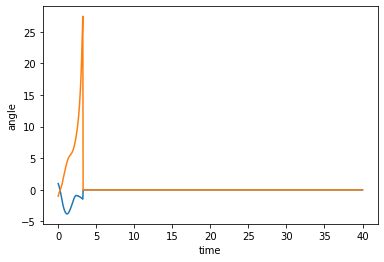

In [27]:
plt.plot(t, theta)
plt.plot(t, alpha) 
plt.xlabel('time')
plt.ylabel('angle')